In [1]:
import sys
try:
    import sntd
except:
    sys.path.append('../')
    import sntd
import numpy as np
import matplotlib.pyplot as plt

Telescope: HST
Object: My Type Ia SN
Number of bands: 2

------------------
Image: image_1:
Bands: ['F125W', 'F110W']
Date Range: 0.00000->123.52941
Number of points: 50

Metadata:
   z:1.33
   t0:10.0
   x0:1.4250074541537846e-05
   x1:1.5953077100190804
   c:0.07653612422442269
   sourcez:1.33
   hostebv:0.0967741935483871
   lensebv:0
   lensz:0.53
   mu:7
   td:10.0
------------------
Image: image_2:
Bands: ['F125W', 'F110W']
Date Range: 25.73529->175.00000
Number of points: 59

Metadata:
   z:1.33
   t0:70.0
   x0:7.125037270768923e-06
   x1:1.5953077100190804
   c:0.07653612422442269
   sourcez:1.33
   hostebv:0.0967741935483871
   lensebv:0
   lensz:0.53
   mu:3.5
   td:70.0
------------------


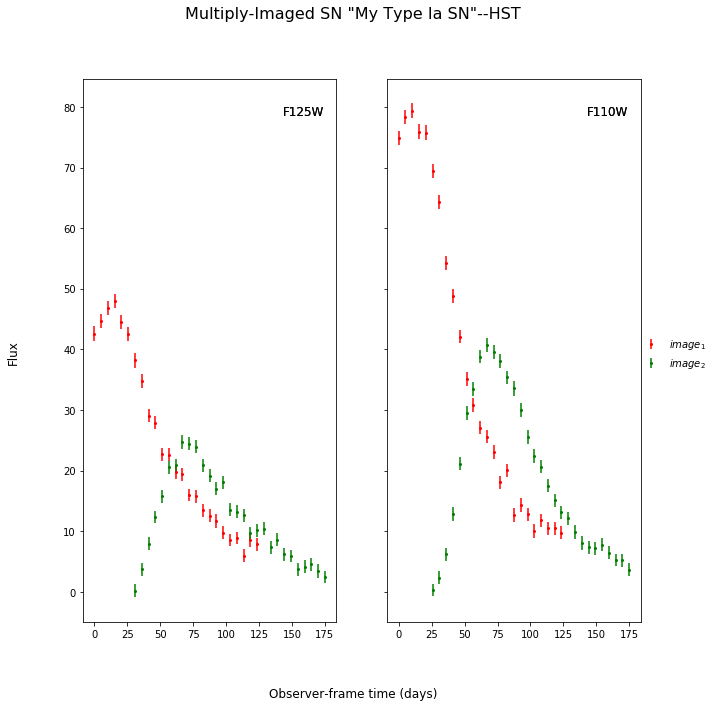

In [2]:
##create a simple MISN and plot
myMISN = sntd.createMultiplyImagedSN(sourcename='salt2-extended', snType='Ia', redshift=1.33,z_lens=.53, bands=['F110W','F125W'],
              zp=[26.8,26.2], cadence=5., epochs=35.,time_delays=[10., 70.], magnifications=[7,3.5],
              objectName='My Type Ia SN',telescopename='HST')
print(myMISN)
myMISN.plot_object()
plt.show()

Telescope: HST
Object: My Type Ia SN
Number of bands: 2

------------------
Image: image_1:
Bands: ['F125W', 'F110W']
Date Range: 55000.00000->55123.52941
Number of points: 50

Metadata:
   z:1.33
   t0:55010.0
   x0:8.72868740241771e-06
   x1:0.48687981161118044
   c:-0.12712734514384016
   sourcez:1.33
   hostebv:0.0967741935483871
   lensebv:0
   lensz:0.53
   mu:7
   td:10.0
------------------
Image: image_2:
Bands: ['F125W', 'F110W']
Date Range: 55025.73529->55175.00000
Number of points: 59

Metadata:
   z:1.33
   t0:55070.0
   x0:4.364343701208855e-06
   x1:0.48687981161118044
   c:-0.12712734514384016
   sourcez:1.33
   hostebv:0.0967741935483871
   lensebv:0
   lensz:0.53
   mu:3.5
   td:70.0
------------------


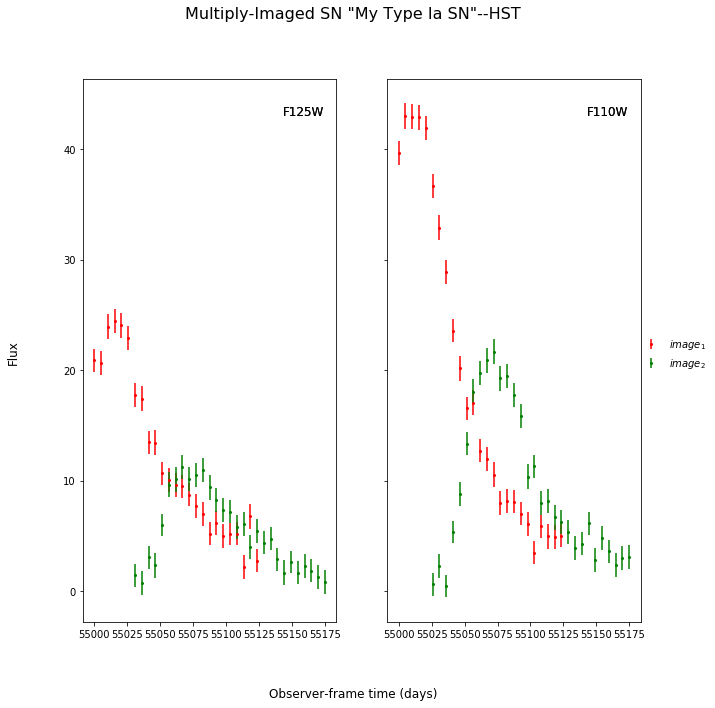

In [3]:
myMISN = sntd.createMultiplyImagedSN(sourcename='salt2-extended', snType='Ia', redshift=1.33,z_lens=.53, bands=['F110W','F125W'],
              zp=[26.8,26.2],start_time=55000, cadence=5., epochs=35.,time_delays=[10., 70.], magnifications=[7,3.5],
              objectName='My Type Ia SN',telescopename='HST')
print(myMISN)
myMISN.plot_object()
plt.show()

Telescope: HST
Object: My Type Ia SN
Number of bands: 2

------------------
Image: image_1:
Bands: ['F125W', 'F110W']
Date Range: 55000.00000->55125.00000
Number of points: 52

Metadata:
   z:1.33
   t0:55010.0
   x0:9.965535738444774e-06
   x1:-0.6720731444765101
   c:-0.08309770296406398
   sourcez:1.33
   hostebv:0.0967741935483871
   lensebv:0
   lensz:0.53
   mu:7
   td:10.0
------------------
Image: image_2:
Bands: ['F125W', 'F110W']
Date Range: 55025.00000->55185.00000
Number of points: 64

Metadata:
   z:1.33
   t0:55070.0
   x0:4.982767869222387e-06
   x1:-0.6720731444765101
   c:-0.08309770296406398
   sourcez:1.33
   hostebv:0.0967741935483871
   lensebv:0
   lensz:0.53
   mu:3.5
   td:70.0
------------------


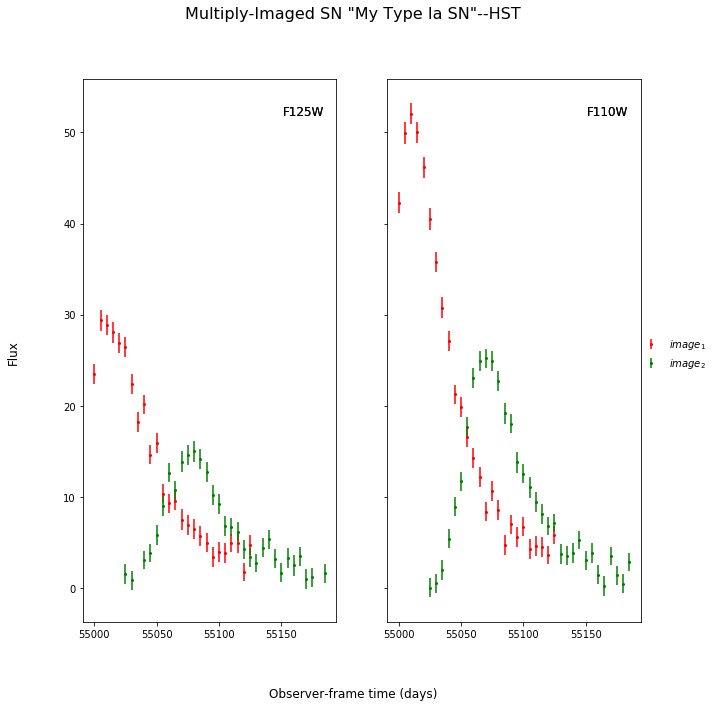

In [4]:
##simulation with specified time array
time_array=np.arange(55000,55300,5)
myMISN = sntd.createMultiplyImagedSN(sourcename='salt2-extended', snType='Ia', redshift=1.33,z_lens=.53, bands=['F110W','F125W'],
              zp=[26.8,26.2], timeArr=time_array,time_delays=[10., 70.], magnifications=[7,3.5],
              objectName='My Type Ia SN',telescopename='HST')
print(myMISN)
myMISN.plot_object()
plt.show()

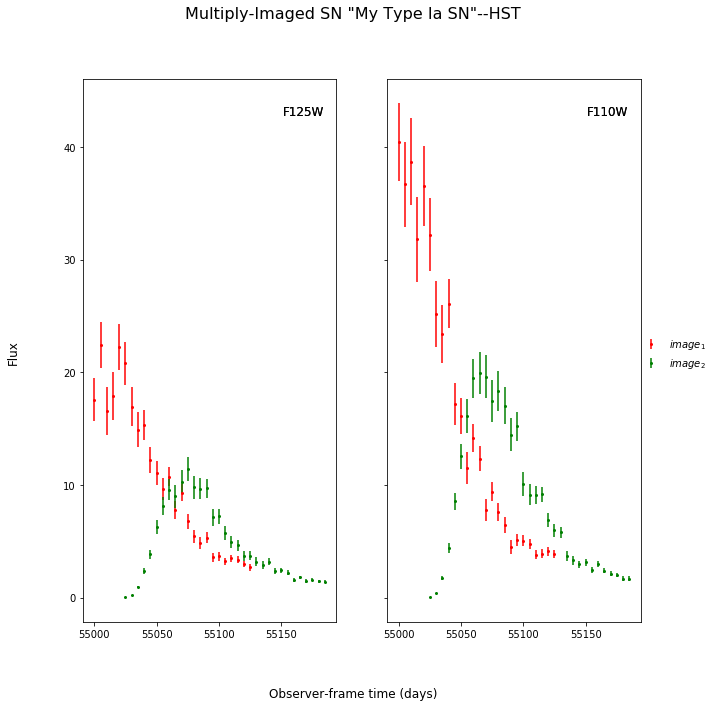

In [7]:
##simulation with specified (constant) SNR
SNR_dict={}
for band in ['F110W','F125W']:
    SNR_dict[band]=lambda mag:10 # this just needs to be a function accepting a magnitude and
                                 # returning a SNR
time_array=np.arange(55000,55300,5)
myMISN = sntd.createMultiplyImagedSN(sourcename='salt2-extended', snType='Ia', redshift=1.33,z_lens=.53, bands=['F110W','F125W'],
              zp=[26.8,26.2], timeArr=time_array,time_delays=[10., 70.], magnifications=[7,3.5],
              objectName='My Type Ia SN',telescopename='HST',snrFunc=SNR_dict)
myMISN.plot_object()
plt.show()

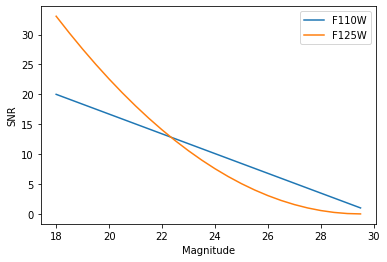

Telescope: HST
Object: My Type Ia SN
Number of bands: 2

------------------
Image: image_1:
Bands: ['F125W', 'F110W']
Date Range: 55000.00000->55125.00000
Number of points: 52

Metadata:
   z:1.33
   t0:55010.0
   x0:7.361224635271635e-06
   x1:-0.2294047863635461
   c:0.10429008994113592
   sourcez:1.33
   hostebv:0.0967741935483871
   lensebv:0
   lensz:0.53
   mu:7
   td:10.0
------------------
Image: image_2:
Bands: ['F125W', 'F110W']
Date Range: 55025.00000->55185.00000
Number of points: 65

Metadata:
   z:1.33
   t0:55070.0
   x0:3.6806123176358173e-06
   x1:-0.2294047863635461
   c:0.10429008994113592
   sourcez:1.33
   hostebv:0.0967741935483871
   lensebv:0
   lensz:0.53
   mu:3.5
   td:70.0
------------------


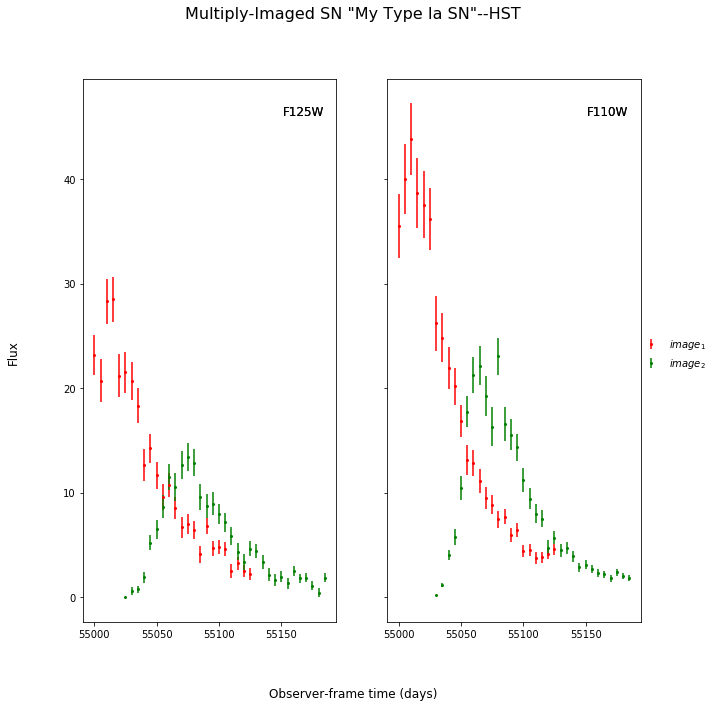

In [20]:
##simulation with specified (non-constant) SNR
from scipy.interpolate import interp1d 
mags=np.arange(18,30,.5) 
SNR_dict={'F110W':np.linspace(20,1,len(mags)), #some random curves for SNR by band (see plot)
          'F125W':np.flip([(x/4)**2 for x in range(len(mags))])}
SNR_funcs={'F110W':interp1d(mags,SNR_dict['F110W'],fill_value=0.5,bounds_error=False),
           'F125W':interp1d(mags,SNR_dict['F125W'],fill_value=0.5,bounds_error=False)}
            #you can leave the bounds error,
            #but this helps with late time light
            #curves
plt.plot(mags,SNR_dict['F110W'],label="F110W")
plt.plot(mags,SNR_dict['F125W'],label="F125W")
plt.xlabel('Magnitude')
plt.ylabel('SNR')
plt.legend()
plt.show()

for band in ['F110W','F125W']:
    SNR_dict[band]=interp1d(mags,SNR_dict[band])
time_array=np.arange(55000,55300,5)
myMISN = sntd.createMultiplyImagedSN(sourcename='salt2-extended', snType='Ia', redshift=1.33,z_lens=.53, bands=['F110W','F125W'],
              zp=[26.8,26.2], timeArr=time_array,time_delays=[10., 70.], magnifications=[7,3.5],
              objectName='My Type Ia SN',telescopename='HST',snrFunc=SNR_funcs)
print(myMISN)
myMISN.plot_object()
plt.show()